# Airbnb Data Analysis: Loading Data

In [24]:
# Project with Airbnb Data 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import DataFrame
from datetime import date, timedelta, datetime

import calendar as c

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## Loading Boston Airbnb Data
df_Boscal = pd.read_csv('./Boston_Airbnb/calendar.csv')
df_Boslist = pd.read_csv('./Boston_Airbnb/listings.csv')
df_Bosrev = pd.read_csv('./Boston_Airbnb/reviews.csv')

## Loading Seattle Airbnb Data
df_Seacal = pd.read_csv('./Seattle_Airbnb/calendar.csv')
df_Sealist = pd.read_csv('./Seattle_Airbnb/listings.csv')
df_Searev = pd.read_csv('./Seattle_Airbnb/reviews.csv')

# Look at the Data

In [25]:
df_Boscal.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [26]:
df_Boslist.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [27]:
df_Bosrev.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [28]:
df_Seacal.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [29]:
df_Boscal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [30]:
df_Seacal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Question1: Evaluate the price Comparison between Boston and Seattle airbnb during first half in a year?

In [31]:
#Selecting First six months in a year (January to June)
df_Bos_date = df_Boscal[(df_Boscal['date'] > '2017-01-01') & (df_Boscal['date'] <= '2017-06-30')]
df_Sea_date = df_Seacal[(df_Seacal['date'] > '2016-01-01') & (df_Seacal['date'] <= '2016-06-30')]

In [32]:
#Select particular columns from both data Sets
df_Boscal_L = df_Bos_date[["date","listing_id","price"]]
df_Seacal_L = df_Sea_date[["date","listing_id","price"]]
df_Seacal_L

,date,listing_id,price
0,2016-01-04,241032,$85.00
1,2016-01-05,241032,$85.00
2,2016-01-06,241032,NaN
3,2016-01-07,241032,NaN
4,2016-01-08,241032,NaN
...,...,...,...
1393379,2016-06-26,10208623,NaN
1393380,2016-06-27,10208623,NaN
1393381,2016-06-28,10208623,NaN
1393382,2016-06-29,10208623,NaN


In [33]:
# Finding missing values in Price Column
m = np.sum(df_Boscal_L.price.isnull())
print("Number of missing price in Boston Data:",m)
n = np.sum(df_Seacal_L.price.isnull())
print("Number of missing price in Seattle Data:",n)

Number of missing price in Boston Data: 314622
Number of missing price in Seattle Data: 233672


In [34]:
#Droping missing values from both Data Sets
Bos_Dout = df_Boscal_L.dropna(subset=['price'],axis =0)
Sea_Dout = df_Seacal_L.dropna(subset=['price'],axis =0)
Sea_Dout

,date,listing_id,price
0,2016-01-04,241032,$85.00
1,2016-01-05,241032,$85.00
9,2016-01-13,241032,$85.00
10,2016-01-14,241032,$85.00
14,2016-01-18,241032,$85.00
...,...,...,...
1393207,2016-01-06,10208623,$87.00
1393208,2016-01-07,10208623,$87.00
1393211,2016-01-10,10208623,$87.00
1393212,2016-01-11,10208623,$87.00


In [35]:
#Select only date and price from both Data Sets
Sel_BOS = Bos_Dout[["date","price"]]
Sel_Sea = Sea_Dout[["date","price"]]
Sel_Sea

,date,price
0,2016-01-04,$85.00
1,2016-01-05,$85.00
9,2016-01-13,$85.00
10,2016-01-14,$85.00
14,2016-01-18,$85.00
...,...,...
1393207,2016-01-06,$87.00
1393208,2016-01-07,$87.00
1393211,2016-01-10,$87.00
1393212,2016-01-11,$87.00


In [36]:
#Concatenate both Data in one Dataframe
df_con = pd.concat([Sel_BOS, Sel_Sea], sort=False)
df_con

,date,price
418,2017-06-30,$75.00
419,2017-06-29,$65.00
420,2017-06-28,$65.00
421,2017-06-27,$65.00
422,2017-06-26,$65.00
...,...,...
1393207,2016-01-06,$87.00
1393208,2016-01-07,$87.00
1393211,2016-01-10,$87.00
1393212,2016-01-11,$87.00


In [37]:
#Convert Date to month and year
df_con['month'] = pd.DatetimeIndex(df_con['date']).month
df_con['year'] = pd.DatetimeIndex(df_con['date']).year

In [38]:
df_con.year

418        2017
419        2017
420        2017
421        2017
422        2017
           ... 
1393207    2016
1393208    2016
1393211    2016
1393212    2016
1393213    2016
Name: year, Length: 780608, dtype: int64

In [39]:
df_con.tail(10)

,date,price,month,year
1393016,2016-06-28,$99.00,6,2016
1393017,2016-06-29,$99.00,6,2016
1393018,2016-06-30,$99.00,6,2016
1393205,2016-01-04,$87.00,1,2016
1393206,2016-01-05,$87.00,1,2016
1393207,2016-01-06,$87.00,1,2016
1393208,2016-01-07,$87.00,1,2016
1393211,2016-01-10,$87.00,1,2016
1393212,2016-01-11,$87.00,1,2016
1393213,2016-01-12,$87.00,1,2016


In [40]:
#Relate City Name with year
df_con["year"] = df_con.year.replace(2017,"Boston")
df_con["year"] = df_con.year.replace(2016,"Seattle")
df_con.year

418         Boston
419         Boston
420         Boston
421         Boston
422         Boston
            ...   
1393207    Seattle
1393208    Seattle
1393211    Seattle
1393212    Seattle
1393213    Seattle
Name: year, Length: 780608, dtype: object

In [41]:
df_con.head(10)

,date,price,month,year
418,2017-06-30,$75.00,6,Boston
419,2017-06-29,$65.00,6,Boston
420,2017-06-28,$65.00,6,Boston
421,2017-06-27,$65.00,6,Boston
422,2017-06-26,$65.00,6,Boston
423,2017-06-25,$65.00,6,Boston
424,2017-06-24,$75.00,6,Boston
425,2017-06-23,$75.00,6,Boston
426,2017-06-22,$65.00,6,Boston
427,2017-06-21,$65.00,6,Boston


In [42]:
#cleaning price column for both data
Clean_Data = df_con.copy()
Clean_Data['price'] = Clean_Data['price'].astype(str)
Clean_Data['price']= Clean_Data['price'].str.replace('$','')
Clean_Data['price']= Clean_Data['price'].str.replace(',','')
Clean_Data['price'] = Clean_Data['price'].astype(float)

In [43]:
#Rename the column name for clear visualization
Airbnb_Data = Clean_Data.rename(columns={"year":"City"})
Airbnb_Data.columns

Index(['date', 'price', 'month', 'City'], dtype='object')

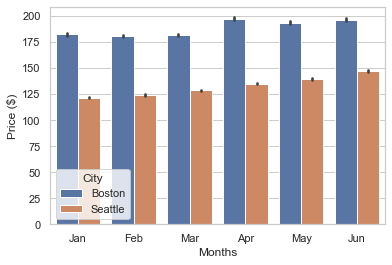

In [44]:
#Comparison of average price between two cities
sns.set_theme(style="whitegrid")
Bos=sns.barplot(x="month",y="price",hue ="City",data=Airbnb_Data)
x_axis=np.arange(1,7)
xlabels = [c.month_abbr[int(x)] if (x > 0 and x <=7) 
               else 0  for x in x_axis]
Bos.set(xlabel='Months', ylabel='Price ($)')
t = Bos.set_xticklabels(xlabels)
plt.show()

# How the price varies depending on the square feet of the home for both cities?

In [45]:
df_Boslist.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [46]:
# Finding missing values in Square feet and Price Column
m = np.sum(df_Boslist.square_feet.isnull())
print("Number of missing square_feet in Boston Data:",m)
n = np.sum(df_Boslist.price.isnull())
print("Number of missing price in Boston Data:",n)

Number of missing square_feet in Boston Data: 3529
Number of missing price in Boston Data: 0


In [47]:
# Finding missing values in Square feet and Price Column
m = np.sum(df_Sealist.square_feet.isnull())
print("Number of missing square_feet in Seattle Data:",m)
n = np.sum(df_Sealist.price.isnull())
print("Number of missing price in Seattle Data:",n)

Number of missing square_feet in Seattle Data: 3721
Number of missing price in Seattle Data: 0


In [48]:
#Droping missing values from both Data Sets
LBos_Dout = df_Boslist.dropna(subset=['square_feet'],axis =0)
LSea_Dout = df_Sealist.dropna(subset=['square_feet'],axis =0)

In [49]:
#Select only square_feet and price from both Data Sets
LSel_BOS = LBos_Dout[["square_feet","price"]]
LSel_Sea = LSea_Dout[["square_feet","price"]]
LSel_Sea

,square_feet,price
96,400.0,$89.00
103,485.0,$97.00
163,800.0,$120.00
182,450.0,$95.00
196,1.0,$180.00
...,...,...
3649,340.0,$125.00
3652,350.0,$68.00
3654,250.0,$86.00
3776,660.0,$115.00


In [50]:
#Clean price columns for both Data sets
Clean_Data = LSel_BOS.copy()
Clean_Data['price'] = Clean_Data['price'].astype(str)
Clean_Data['price']= Clean_Data['price'].str.replace('$','')
Clean_Data['price']= Clean_Data['price'].str.replace(',','')
Clean_Data['price'] = Clean_Data['price'].astype(float)
Clean_Data2 = LSel_Sea.copy()
Clean_Data2['price'] = Clean_Data2['price'].astype(str)
Clean_Data2['price']= Clean_Data2['price'].str.replace('$','')
Clean_Data2['price']= Clean_Data2['price'].str.replace(',','')
Clean_Data2['price'] = Clean_Data2['price'].astype(float)

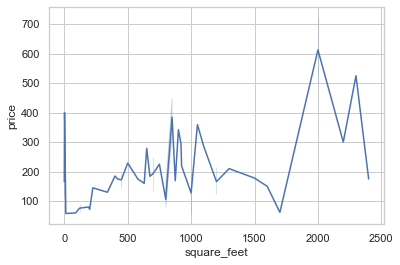

In [51]:
#Plotting Boston Data considering price change with square feet
sns.set_theme(style="whitegrid")
Bos=sns.lineplot(x="square_feet",y="price",data=Clean_Data)
plt.show()

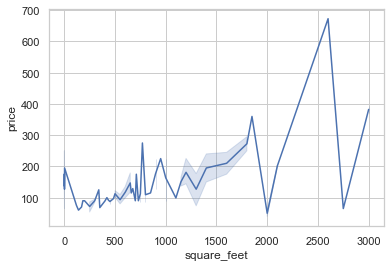

In [53]:
#Plotting Seattle Data considering price change with square feet
sns.set_theme(style="whitegrid")
Bos=sns.lineplot(x="square_feet",y="price",data=Clean_Data2)
plt.show()

# Does reviewer score depend on the price considering positive and negative reviews?

In [54]:
df_Boslist.review_scores_value

0        NaN
1        9.0
2       10.0
3       10.0
4       10.0
        ... 
3580     9.0
3581     NaN
3582     NaN
3583     7.0
3584     NaN
Name: review_scores_value, Length: 3585, dtype: float64

In [55]:
#Selecting quantative columns for both Data Sets
df_Boslist=df_Boslist[["review_scores_value","price"]]
df_Sealist=df_Sealist[["review_scores_value","price"]]
df_Sealist

,review_scores_value,price
0,10.0,$85.00
1,10.0,$150.00
2,10.0,$975.00
3,NaN,$100.00
4,9.0,$450.00
...,...,...
3813,8.0,$359.00
3814,10.0,$79.00
3815,NaN,$93.00
3816,NaN,$99.00


In [56]:
# Finding missing values in review_scores_value and Price Column for Boston Data Set
m = np.sum(df_Boslist.review_scores_value.isnull())
print("Number of missing review_scores_value in Boston Data:",m)
n = np.sum(df_Boslist.price.isnull())
print("Number of missing price in Boston Data:",n)

Number of missing review_scores_value in Boston Data: 821
Number of missing price in Boston Data: 0


In [58]:
# Finding missing values in review_scores_value and Price Column for Seatle Data Set
m = np.sum(df_Sealist.review_scores_value.isnull())
print("Number of missing review_scores_value in Seattle Data:",m)
n = np.sum(df_Sealist.price.isnull())
print("Number of missing price in Seattle Data:",n)

Number of missing review_scores_value in Seattle Data: 656
Number of missing price in Seattle Data: 0


In [59]:
#Droping missing values from both Data Sets
RBos_Dout = df_Boslist.dropna(subset=['review_scores_value'],axis =0)
RSea_Dout = df_Sealist.dropna(subset=['review_scores_value'],axis =0)

In [60]:
RBos_Dout

,review_scores_value,price
1,9.0,$65.00
2,10.0,$65.00
3,10.0,$75.00
4,10.0,$79.00
5,10.0,$75.00
...,...,...
3574,8.0,$68.00
3575,7.0,$69.00
3578,10.0,$85.00
3580,9.0,$69.00


In [61]:
#Finding Positive and Negative reviews
def Pos_neg_review(x):
    if x >= 5: 
        return 1
    else: return 0

In [62]:
m = RBos_Dout.shape[0]
RBos_Dout=pd.DataFrame(RBos_Dout)
RSea_Dout=pd.DataFrame(RSea_Dout)

In [63]:
RBos_Dout['Review_Pos_Neg'] = RBos_Dout.loc[:,('review_scores_value')].apply(Pos_neg_review)
RSea_Dout['Review_Pos_Neg'] = RBos_Dout.loc[:,('review_scores_value')].apply(Pos_neg_review)
RSea_Dout

,review_scores_value,price,Review_Pos_Neg
0,10.0,$85.00,NaN
1,10.0,$150.00,1.0
2,10.0,$975.00,1.0
4,9.0,$450.00,1.0
5,10.0,$120.00,1.0
...,...,...,...
3810,8.0,$154.00,NaN
3811,10.0,$65.00,NaN
3812,10.0,$95.00,NaN
3813,8.0,$359.00,NaN


In [64]:
#Cleaning price column for Both Data Sets
Clean_Data = RBos_Dout.copy()
Clean_Data['price'] = Clean_Data['price'].astype(str)
Clean_Data['price']= Clean_Data['price'].str.replace('$','')
Clean_Data['price']= Clean_Data['price'].str.replace(',','')
Clean_Data['price'] = Clean_Data['price'].astype(float)
Clean_Data2 = RSea_Dout.copy()
Clean_Data2['price'] = Clean_Data2['price'].astype(str)
Clean_Data2['price']= Clean_Data2['price'].str.replace('$','')
Clean_Data2['price']= Clean_Data2['price'].str.replace(',','')
Clean_Data2['price'] = Clean_Data2['price'].astype(float)

In [65]:
m=np.sum(Clean_Data['Review_Pos_Neg']==1)
print("Number of positive review in Boston Data:",m)
n=np.sum(Clean_Data['Review_Pos_Neg']==0)
print("Number of negative review in Boston Data:",n)

Number of positive review in Boston Data: 2743
Number of negative review in Boston Data: 21


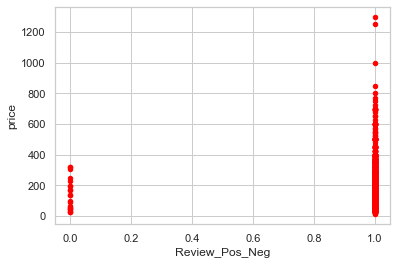

In [66]:
#Plotting number of positive review and negative reviews in terms of price for Boston Data set
sns.set_theme(style="whitegrid")
Clean_Data.plot(kind='scatter',x='Review_Pos_Neg',y='price',color='red')
plt.show()

In [67]:
m=np.sum(Clean_Data2['Review_Pos_Neg']==1)
print("Number of positive review in Seatle Data:",m)
n=np.sum(Clean_Data2['Review_Pos_Neg']==0)
print("Number of negative review in Seattle Data:",n)

Number of positive review in Seatle Data: 2265
Number of negative review in Seattle Data: 18


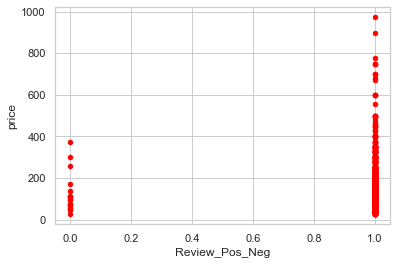

In [68]:
#Plotting number of positive review and negative reviews in terms of price for Seattle Data set
Clean_Data2.plot(kind='scatter',x='Review_Pos_Neg',y='price',color='red')
plt.show()